In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [15]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

In [18]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
df['Price']=california.target

In [21]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
x = df['MedInc'].values.reshape(-1,1)
y = df['Price'].values

Defining a function to compute AIC

For BIC the only difference is the formula:
    n*np.log(mse) + np.log(n)*k

In [31]:
def compute_aic(n,mse,k):
    return n*np.log(mse) + 2*k

Defining Range of Polynomial degrees to test

In [32]:
degrees =[1,2,3,4,5,6]

In [33]:
aic_scores=[]
models=[]

In [34]:
for degree in degrees:
    poly=PolynomialFeatures(degree)
    x_poly=poly.fit_transform(x)
    
    model=LinearRegression()
    model.fit(x_poly,y)
    
    y_pred=model.predict(x_poly)
    
    mse=mean_squared_error(y,y_pred)
    
    # Number of Features in the model (including the Intercept)
    k=x_poly.shape[1]
    
    aic=compute_aic(len(y),mse,k)
    
    aic_scores.append(aic)
    models.append(model)

Selecting the Best Model

In [36]:
best_index = np.argmin(aic_scores)
best_model=models[best_index]
best_degree=degrees[best_index]
best_aic=aic_scores[best_index]

In [37]:
print(f"Best Polynomial Degree (AIC): {best_degree}")
print(f"Best AIC Score: {best_aic}")

Best Polynomial Degree (AIC): 6
Best AIC Score: -7880.174188692518


Plotting the Results 

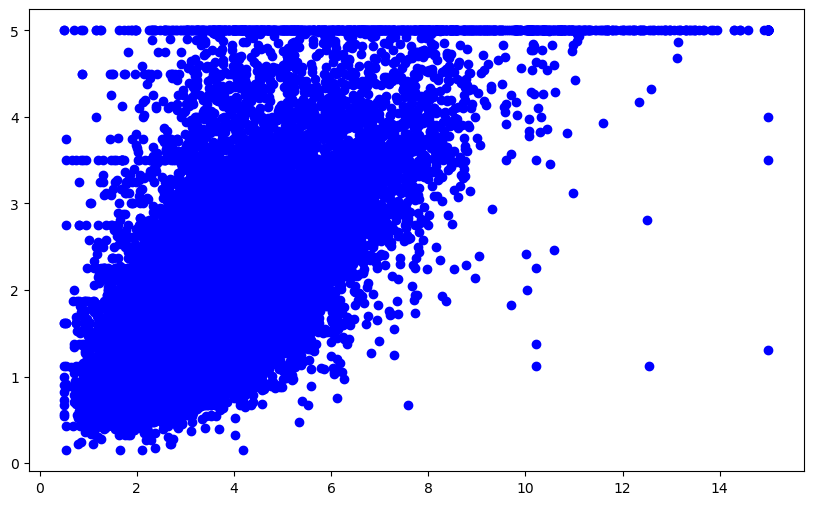

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='b',label='Actual Data')

Plotting the Regression Line 

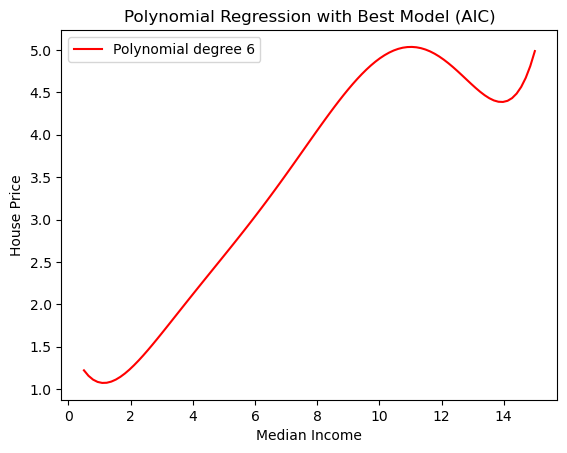

In [41]:
x_plot=np.linspace(x.min(),x.max(),100).reshape(-1,1)
poly=PolynomialFeatures(best_degree)
x_plot_poly = poly.fit_transform(x_plot)
y_plot=best_model.predict(x_plot_poly)

plt.plot(x_plot, y_plot, color='red', label=f'Polynomial degree {best_degree}')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Polynomial Regression with Best Model (AIC)')
plt.legend()
plt.show()